32428 25
15668 9
15855 13
18873 11
15375 11
19503 10
20039 10
17776 12
15674 9
18717 10


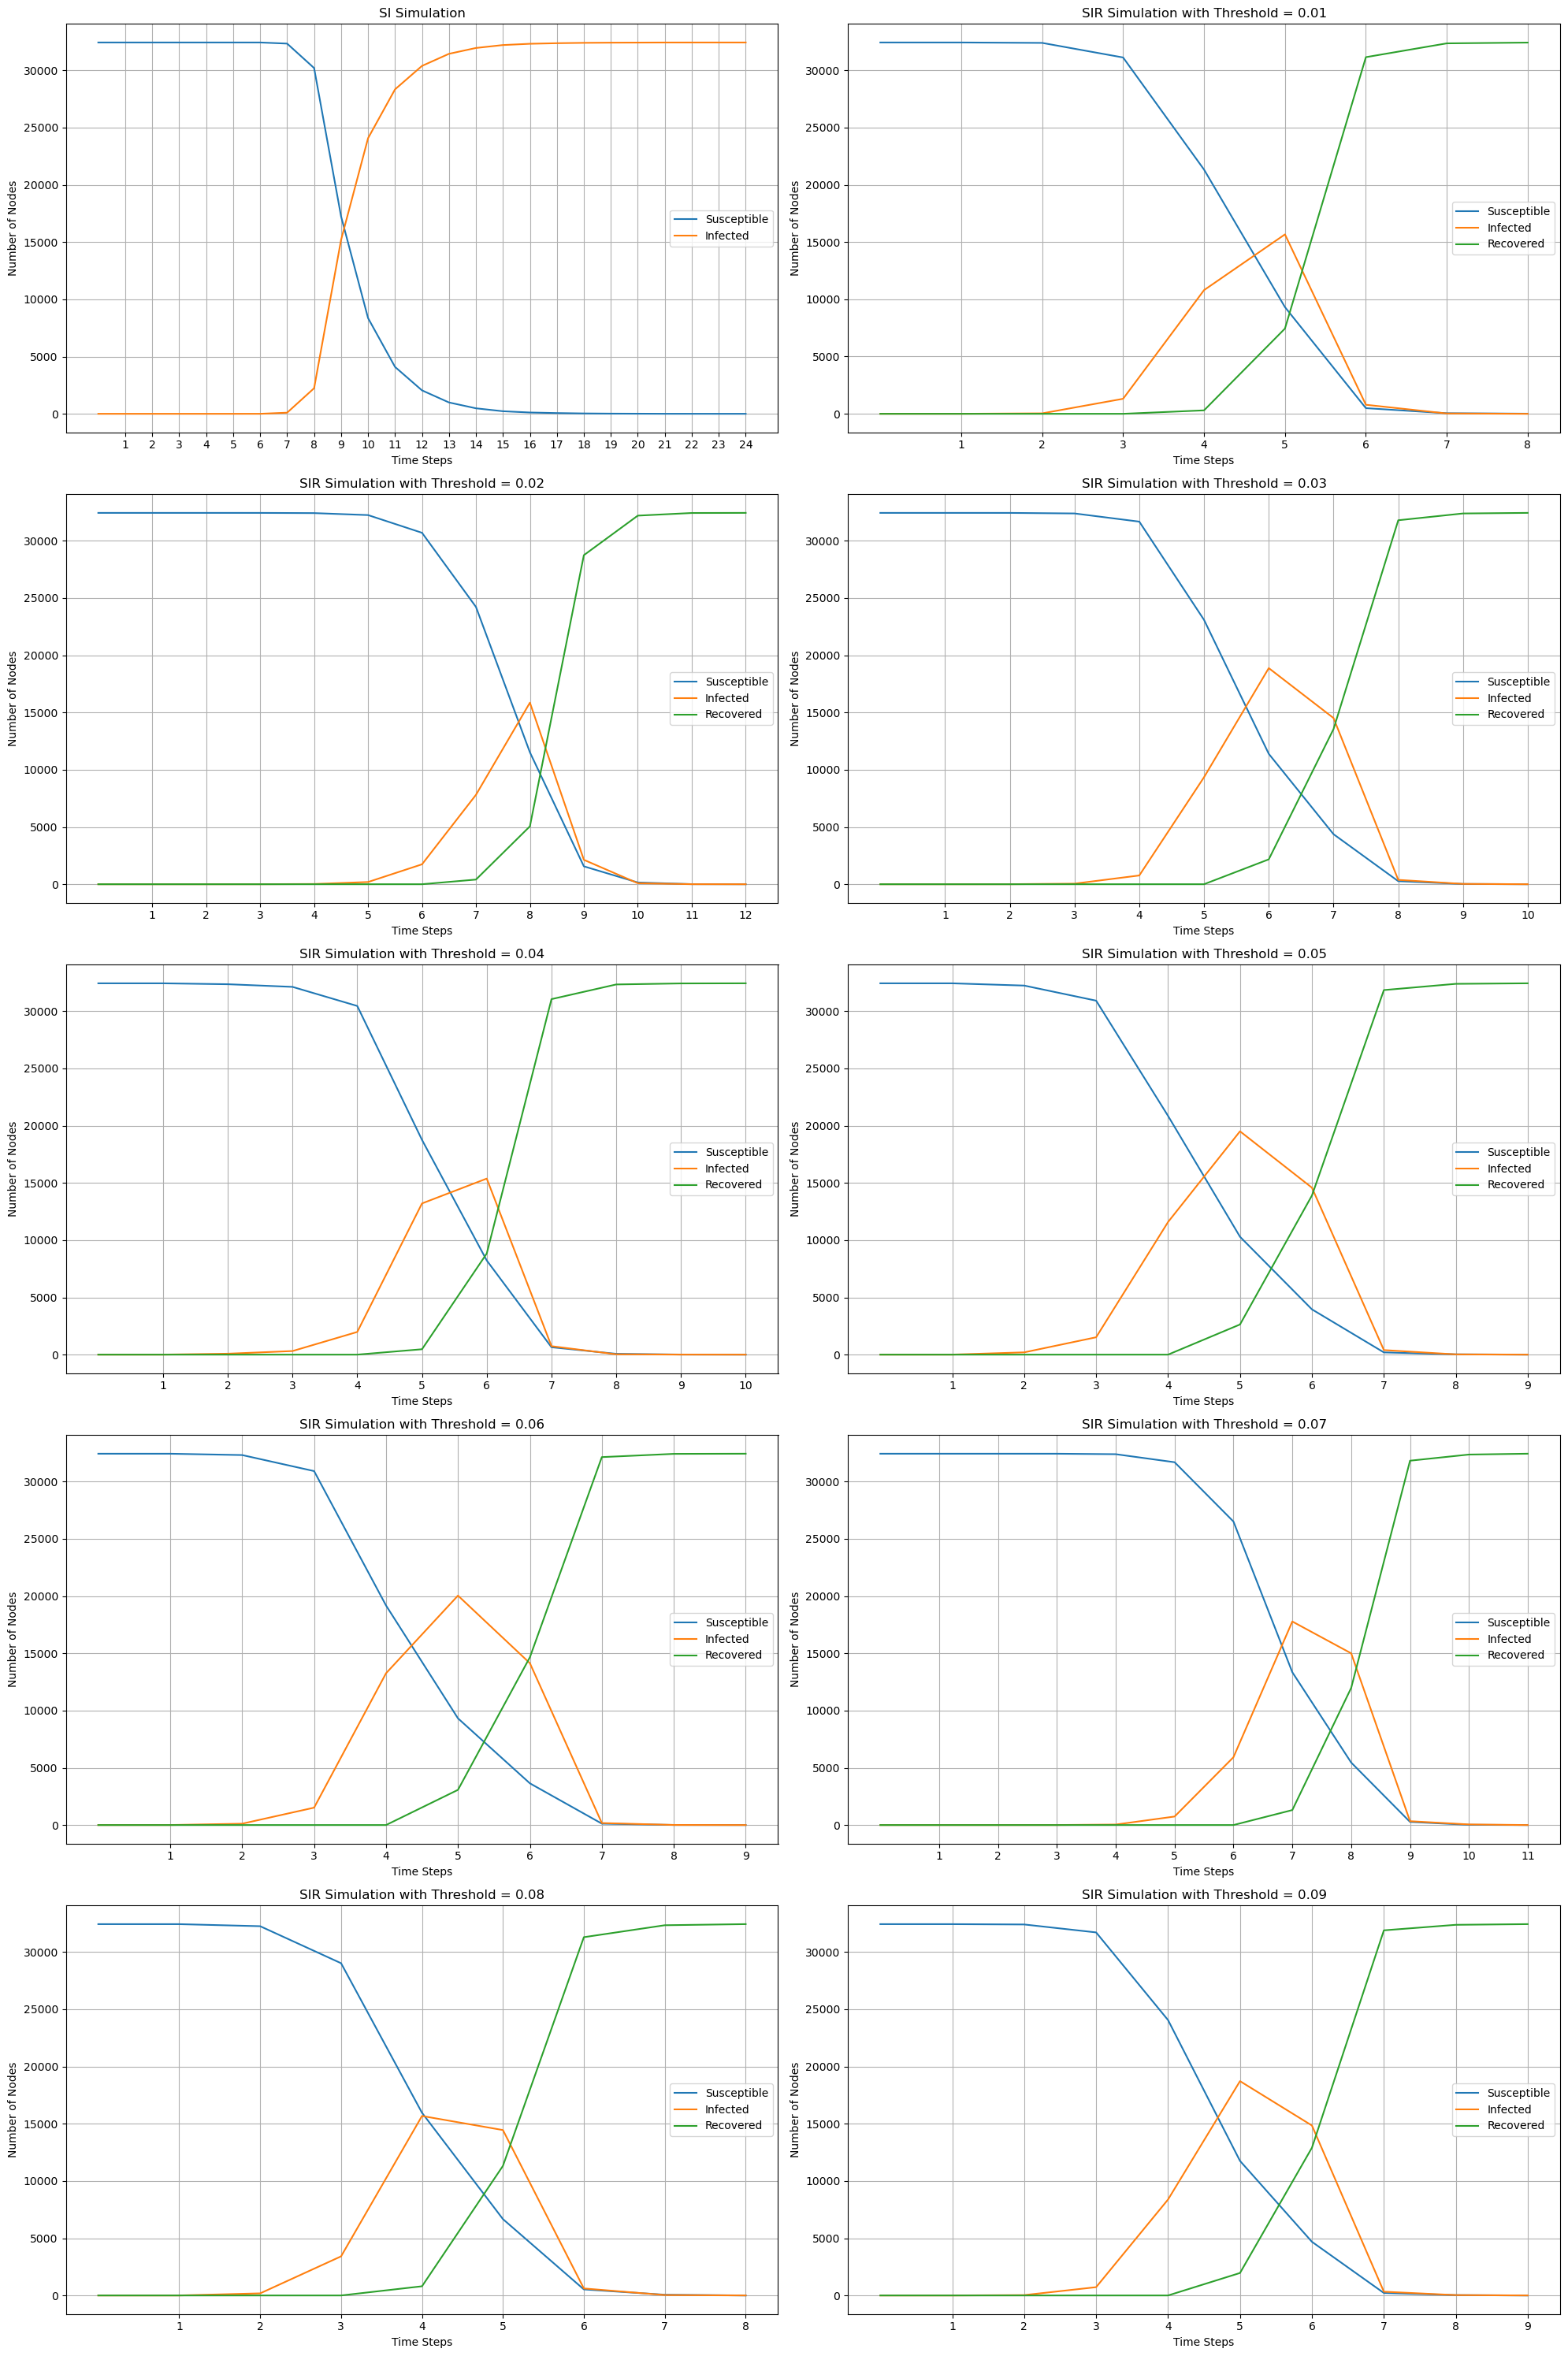

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5      # Transmission probability
gamma = 0.23    # Recovery probability
initial_infected = 1
time_steps = 25  # Adjust based on required duration

# Initialize plot
plt.figure(figsize=(20, 30))

# Loop through thresholds from 0.1 to 0.9
for i, recovery_threshold in enumerate(np.arange(0.0, 0.1, 0.01), start=1):
    # Initialize states
    if recovery_threshold == 0.0:
        gamma = 0
    else:
        gamma = 0.23
    nodes = list(G.nodes)
    n = len(nodes)
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'
#     node_states[102] = 'R'  # Make sure a node starts as recovered
    
    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(1, time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'
                    
            if node_states[node] == 'R':  # Recovered node spreads immunity
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break
    print(max(infected_counts), len(infected_counts))
    # Plot results for the current threshold
    plt.subplot(5, 2, i)
    if recovery_threshold == 0.0:
        plt.title("SI Simulation")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()
    else:
        plt.title(f"SIR Simulation with Threshold = {recovery_threshold:.2f}")
        plt.plot(susceptible_counts, label="Susceptible")
        plt.plot(infected_counts, label="Infected")
        plt.plot(recovered_counts, label="Recovered")
        plt.xlabel("Time Steps")
        plt.ylabel("Number of Nodes")
        plt.xticks(ticks = range(1, len(susceptible_counts)))
        plt.legend()
        plt.grid()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()


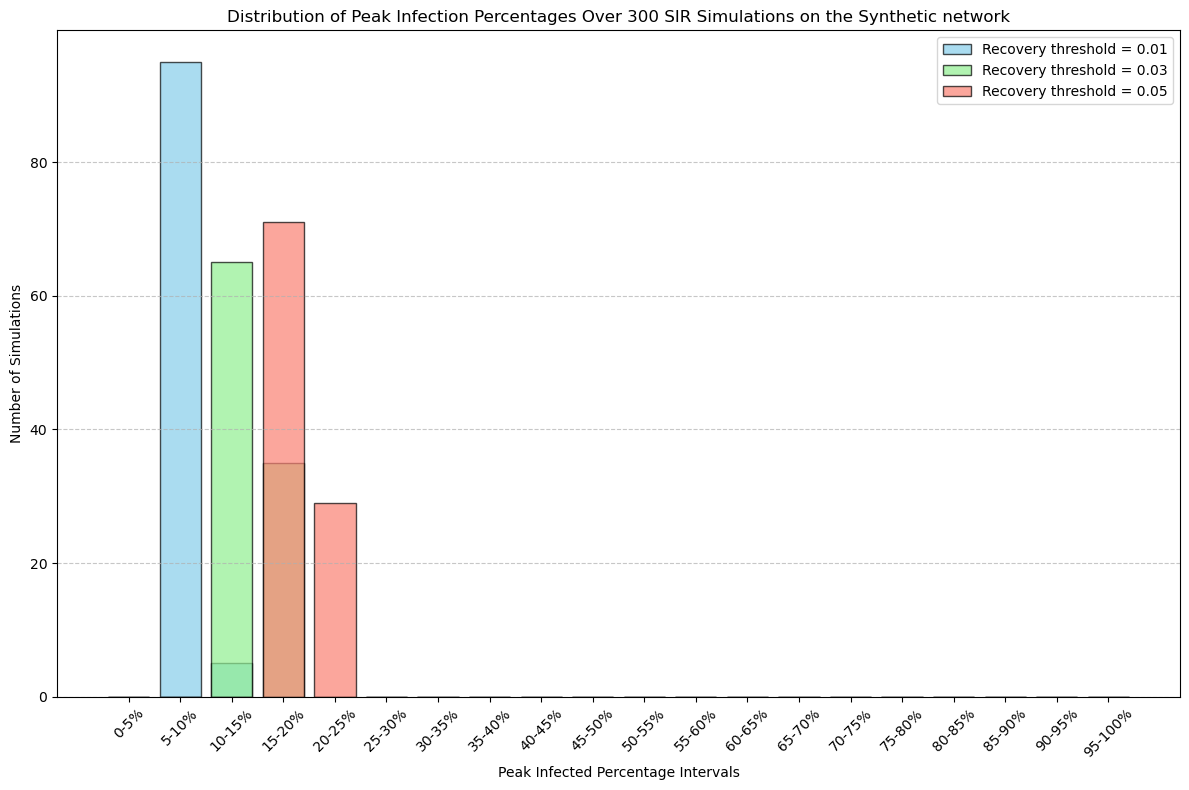

In [46]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data\\final_final_random_graph.csv'  # Update with the actual path to your file
#file_path = 'data\data - fixed numbers.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5  # Transmission probability
gamma = 0.23  # Recovery probability
time_steps = 25  # Duration of each simulation

# Simulation parameters
num_simulations = 300
recovery_thresholds = [0.01, 0.03, 0.05]  # Recovery thresholds to cycle through
intervals = np.arange(0, 1.05, 0.05)  # Intervals: 0-5%, 5-10%, ..., 95-100%
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for each threshold
hist_data = {threshold: [] for threshold in recovery_thresholds}  # Store data by threshold

# Run simulations
for sim in range(num_simulations):
    # Select the recovery threshold based on simulation index
    recovery_threshold = recovery_thresholds[sim // 100]
    
    # Initialize states
    nodes = list(G.nodes)
    n = len(nodes)
    initial_infected = 1
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'

    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'

            if node_states[node] == 'R':        
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break

    # Record peak infected fraction
    peak_infected_fraction = max(infected_counts) / n
    hist_data[recovery_threshold].append(peak_infected_fraction)

# Combine histogram data
plt.figure(figsize=(12, 8))
for i, threshold in enumerate(recovery_thresholds):
    hist, bins = np.histogram(hist_data[threshold], bins=intervals)
    plt.bar(
        [f"{int(bins[j]*100)}-{int(bins[j+1]*100)}%" for j in range(len(bins) - 1)],
        hist,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
        label=f"Recovery threshold = {threshold}"
    )

# Customize plot
plt.xlabel("Peak Infected Percentage Intervals")
plt.ylabel("Number of Simulations")
plt.title("Distribution of Peak Infection Percentages Over 300 SIR Simulations on the Synthetic network")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("fig_synth_histogram_300_sims.png")
plt.show()


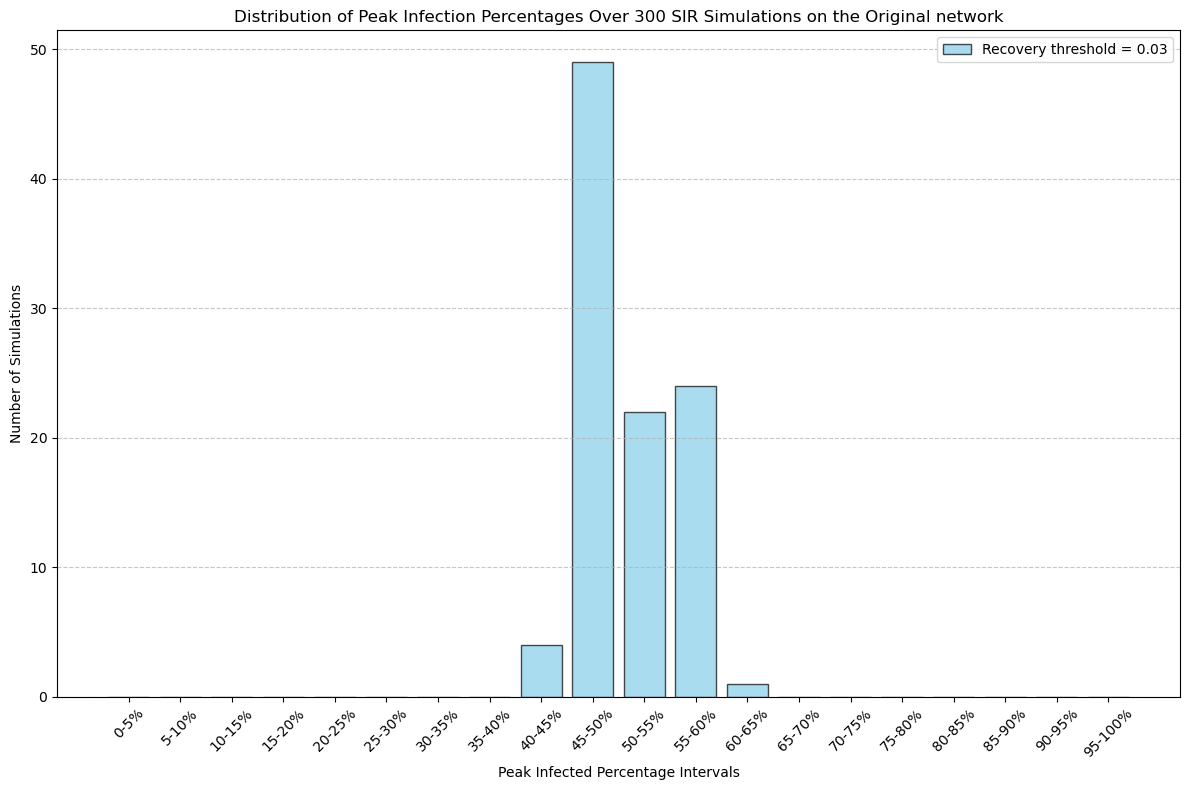

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and create the graph
file_path = 'data\data - fixed numbers.csv'  # Update with the actual path to your file
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5  # Transmission probability
gamma = 0.23  # Recovery probability
time_steps = 25  # Duration of each simulation

# Simulation parameters
num_simulations = 300
recovery_thresholds = [0.01, 0.03, 0.05]  # Recovery thresholds to cycle through
intervals = np.arange(0, 1.05, 0.05)  # Intervals: 0-5%, 5-10%, ..., 95-100%
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for each threshold
hist_data = {threshold: [] for threshold in recovery_thresholds}  # Store data by threshold

# Run simulations
for sim in range(num_simulations):
    # Select the recovery threshold based on simulation index
    recovery_threshold = recovery_thresholds[sim // 100]
    
    # Initialize states
    nodes = list(G.nodes)
    n = len(nodes)
    initial_infected = 1
    infected_nodes = np.random.choice(nodes, replace=False)
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    node_states[infected_nodes] = 'I'

    # Record initial state counts
    susceptible_counts = [n - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [0]

    # Simulation loop
    for t in range(time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
                # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > recovery_threshold:
                    new_states[node] = 'R'

            if node_states[node] == 'R':        
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break

    # Record peak infected fraction
    peak_infected_fraction = max(infected_counts) / n
    hist_data[recovery_threshold].append(peak_infected_fraction)

# Combine histogram data
plt.figure(figsize=(12, 8))
for i, threshold in enumerate(recovery_thresholds):
    hist, bins = np.histogram(hist_data[threshold], bins=intervals)
    plt.bar(
        [f"{int(bins[j]*100)}-{int(bins[j+1]*100)}%" for j in range(len(bins) - 1)],
        hist,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
        label=f"Recovery threshold = {threshold}"
    )

# Customize plot
plt.xlabel("Peak Infected Percentage Intervals")
plt.ylabel("Number of Simulations")
plt.title("Distribution of Peak Infection Percentages Over 300 SIR Simulations on the Original network")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("fig_original_histogram_300_sims.png")
plt.show()


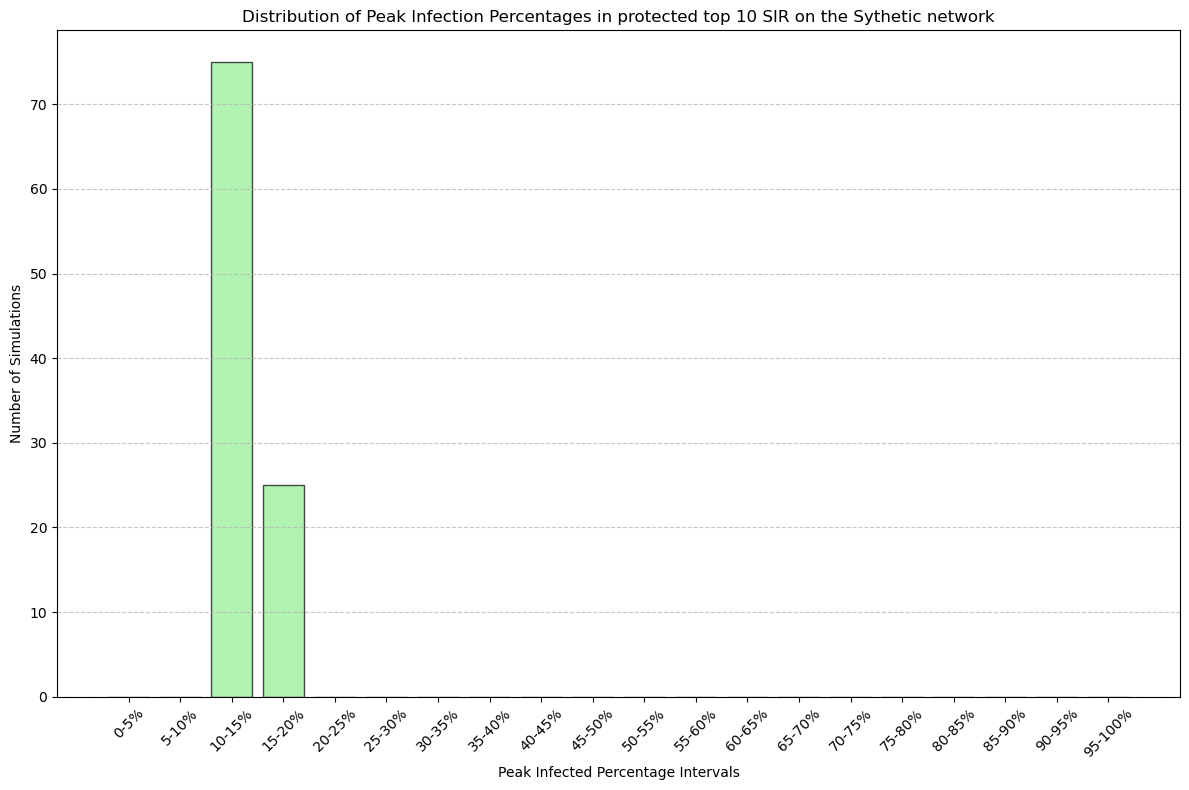

In [51]:
# Load the CSV file and create the graph
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#file_path = 'data\data - fixed numbers.csv'  # Update with the actual path to your file 'data\data - fixed numbers.csv'

file_path = 'data\\final_final_random_graph.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5  # Transmission probability
gamma = 0.23  # Recovery probability
time_steps = 25  # Duration of each simulation

# Simulation parameters
num_simulations = 100
recovery_thresholds = [0.03]  # Recovery thresholds to cycle through
intervals = np.arange(0, 1.05, 0.05)  # Intervals: 0-5%, 5-10%, ..., 95-100%
colors = ['lightgreen']  # Colors for each threshold
hist_data = {threshold: [] for threshold in recovery_thresholds}  # Store data by threshold
degree_dict = dict(G.degree())


#print(top_10_nodes)
# Run simulations
for sim in range(num_simulations):
    
    # Select the recovery threshold based on simulation index
    recovery_threshold = recovery_thresholds[0]
    rt_mark=recovery_threshold
    # Initialize states
    nodes = list(G.nodes)   
    n = len(nodes)
    # Determine top 5 nodes by degree
    degree_dict = dict(G.degree())
    top_10_nodes = [node for node, degree in sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]]

    # Exclude top 5 nodes from the choice pool for initial infected
    eligible_nodes = [node for node in nodes if node not in top_10_nodes]
    initial_infected = 1
    infected_nodes = np.random.choice(eligible_nodes, size=initial_infected, replace=False)

    # Set initial states
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    for node in infected_nodes:
        node_states[node] = 'I'

    # Make top 5 nodes recovered
    for node in top_10_nodes:
        node_states[node] = 'R'
    # Record initial state counts
    susceptible_counts = [(n-len(top_10_nodes)) - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [len(top_10_nodes)]
    rec=False
    #print(sim, top_10_nodes, infected_nodes )
    # Simulation loop
    for t in range(time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                    if node_states[neighbor]=='R':
                        rec==True
            # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > rt_mark:
                    rec=True
                    new_states[node] = 'R'
                    continue
                
            if node_states[node] == 'R' and rec==True:    
                rt_mark=0    
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
        
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break

    # Record peak infected fraction
    peak_infected_fraction = max(infected_counts) / n
    hist_data[recovery_threshold].append(peak_infected_fraction)

# Combine histogram data
plt.figure(figsize=(12, 8))
for i, threshold in enumerate(recovery_thresholds):
    hist, bins = np.histogram(hist_data[threshold], bins=intervals)
    plt.bar(
        [f"{int(bins[j]*100)}-{int(bins[j+1]*100)}%" for j in range(len(bins) - 1)],
        hist,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
        label=f"Recovery threshold = {threshold}"
    )
#print(hist_data)
# Customize plot
plt.xlabel("Peak Infected Percentage Intervals")
plt.ylabel("Number of Simulations")
plt.title("Distribution of Peak Infection Percentages in protected top 10 SIR on the Sythetic network")
plt.xticks(rotation=45)
#plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("fig_protected10_syth_histogram_100_sims.png")
plt.show()

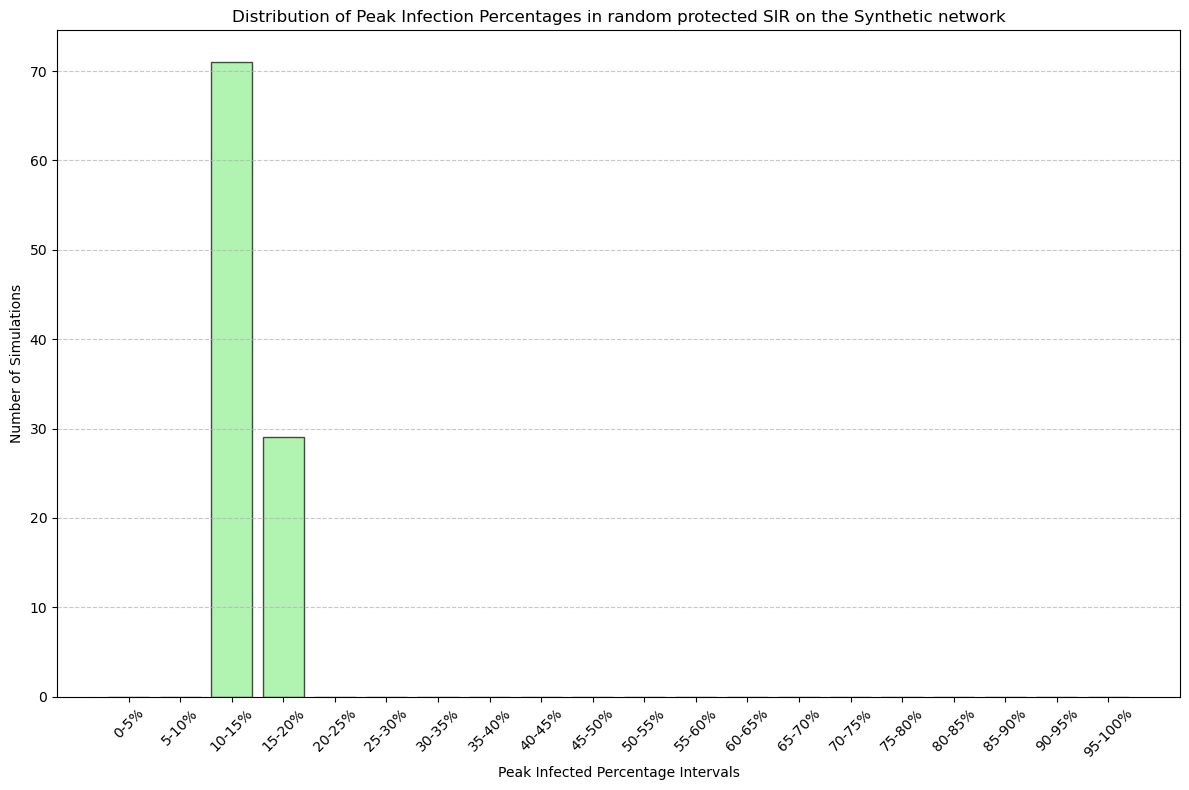

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#file_path = 'data\data - fixed numbers.csv'  # Update with the actual path to your file 'data\data - fixed numbers.csv'

file_path = 'data\\final_final_random_graph.csv'
edge_df = pd.read_csv(file_path, delimiter=' ')
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')

# SIR parameters
beta = 0.5  # Transmission probability
gamma = 0.23  # Recovery probability
time_steps = 25  # Duration of each simulation

# Simulation parameters
num_simulations = 100
recovery_thresholds = [0.03]  # Recovery thresholds to cycle through
intervals = np.arange(0, 1.05, 0.05)  # Intervals: 0-5%, 5-10%, ..., 95-100%
colors = ['lightgreen']  # Colors for each threshold
hist_data = {threshold: [] for threshold in recovery_thresholds}  # Store data by threshold
degree_dict = dict(G.degree())


#print(top_10_nodes)
# Run simulations
for sim in range(num_simulations):
    
    # Select the recovery threshold based on simulation index
    recovery_threshold = recovery_thresholds[0]
    rt_mark=recovery_threshold
    # Initialize states
    nodes = list(G.nodes)   
    n = len(nodes)
    # Determine top 5 nodes by degree
    degree_dict = dict(G.degree())
    top_10_nodes =np.random.choice(nodes, size=10, replace=False)

    # Exclude top 5 nodes from the choice pool for initial infected
    eligible_nodes = [node for node in nodes if node not in top_10_nodes]
    initial_infected = 1
    infected_nodes = np.random.choice(eligible_nodes, size=initial_infected, replace=False)

    # Set initial states
    node_states = {node: 'S' for node in nodes}  # All nodes start as Susceptible (S)
    for node in infected_nodes:
        node_states[node] = 'I'

    # Make top 5 nodes recovered
    for node in top_10_nodes:
        node_states[node] = 'R'
    # Record initial state counts
    susceptible_counts = [(n-len(top_10_nodes)) - initial_infected]
    infected_counts = [initial_infected]
    recovered_counts = [len(top_10_nodes)]
    rec=False
    #print(sim, top_10_nodes, infected_nodes )
    # Simulation loop
    for t in range(time_steps):
        new_states = node_states.copy()
        for node in nodes:
            if node_states[node] == 'I':  # Infected node
            # Spread to neighbors
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.rand() < beta:
                        new_states[neighbor] = 'I'
                    if node_states[neighbor]=='R':
                        rec==True
            # Recover
                if np.random.rand() < gamma and infected_counts[-1] / n > rt_mark:
                    rec=True
                    new_states[node] = 'R'
                    continue
                
            if node_states[node] == 'R' and rec==True:    
                rt_mark=0    
                for neighbor in G.neighbors(node):
                    if node_states[neighbor] == 'S' or node_states[neighbor] == 'I':
                        new_states[neighbor] = 'R'
      
        # Update states
        node_states = new_states
        susceptible_counts.append(sum(1 for state in node_states.values() if state == 'S'))
        infected_counts.append(sum(1 for state in node_states.values() if state == 'I'))
        recovered_counts.append(sum(1 for state in node_states.values() if state == 'R'))
        
        # Break if no more infected
        if infected_counts[-1] == 0:
            break

    # Record peak infected fraction
    peak_infected_fraction = max(infected_counts) / n
    hist_data[recovery_threshold].append(peak_infected_fraction)

# Combine histogram data
plt.figure(figsize=(12, 8))
for i, threshold in enumerate(recovery_thresholds):
    hist, bins = np.histogram(hist_data[threshold], bins=intervals)
    plt.bar(
        [f"{int(bins[j]*100)}-{int(bins[j+1]*100)}%" for j in range(len(bins) - 1)],
        hist,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
        label=f"Recovery threshold = {threshold}"
    )
#print(hist_data)
# Customize plot
plt.xlabel("Peak Infected Percentage Intervals")
plt.ylabel("Number of Simulations")
plt.title("Distribution of Peak Infection Percentages in random protected SIR on the Synthetic network")
plt.xticks(rotation=45)
#plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("fig_protectedr_syn_histogram_100_sims.png")
plt.show()

In [ ]:
print(degree_dict[11396])

1


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label="Susceptible")
plt.plot(infected_counts, label="Infected")
plt.plot(recovered_counts, label="Recovered")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("Protected SIR Simulation original")
plt.xticks(ticks=range(len(susceptible_counts))) 
plt.legend()
plt.grid()
plt.savefig("fig_protected_extreem_original.png")
plt.show()